In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt_2

#对中文字符的处理
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
#让坐标轴能够正常显示正负号
plt.rcParams['axes.unicode_minus']

True

**数据导入初处理**

In [2]:
data= pd.read_csv("data_2_1_clean.csv")
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
cols=data.shape[1]
data_x=data.iloc[:,1:cols-1]
data_y=data['满足']

- 给data_x插入x0列

In [4]:
data_x.shape
#m*(n+1)

(116502, 12)

In [5]:
data_y.shape
#m*1

(116502,)

In [6]:
data_x=data_x[:5000]
data_y=data_y[:5000]
data_x.drop('客户ID',axis=1)

,年龄,飞行距离,机上wifi服务,方便在线预订,餐饮,在线登机,座位舒适度,机上娱乐,腿部空间服务,行李处理,值机服务
0,13,460,3,3,5,3,5,5,3,4,4
1,25,235,3,3,1,3,1,1,5,3,1
2,26,1142,2,2,5,5,5,5,3,4,4
3,25,562,2,5,2,2,2,2,5,3,1
4,61,214,3,3,4,5,5,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...
4995,55,644,2,3,3,5,5,4,4,4,4
4996,49,372,4,1,4,4,4,4,5,4,3
4997,51,642,1,1,2,1,2,2,4,5,4
4998,52,587,5,5,3,5,3,3,5,4,5


## 标准化

In [7]:
def z_score (data_x):
    for i in data_x.columns.tolist():
        inner=data_x[i]-data_x[i].mean()
        data_x[i]=inner/data_x[i].std()
    return data_x

In [8]:
z_score(data_x)
data_x.insert(0,'x0',1)

In [9]:
data_x

,x0,客户ID,年龄,飞行距离,机上wifi服务,方便在线预订,餐饮,在线登机,座位舒适度,机上娱乐,腿部空间服务,行李处理,值机服务
0,1,0.138415,-1.694675,-0.710837,0.197801,0.181320,1.355162,-0.142212,1.213236,1.272186,-0.232536,0.331067,0.554208
1,1,-1.614364,-0.913011,-1.007425,0.197801,0.181320,-1.651299,-0.142212,-1.788338,-1.724365,1.290293,-0.514787,-1.820292
2,1,1.211103,-0.847872,0.188154,-0.562388,-0.536494,1.355162,1.333012,1.213236,1.272186,-0.232536,0.331067,0.554208
3,1,-1.103562,-0.913011,-0.576384,-0.562388,1.616947,-0.899683,-0.879823,-1.037945,-0.975227,1.290293,-0.514787,-1.820292
4,1,1.460623,1.431984,-1.035107,0.197801,0.181320,0.603547,1.333012,1.213236,-0.226090,0.528878,0.331067,-0.237292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1.655454,1.041151,-0.468294,-0.562388,0.181320,-0.148068,1.333012,1.213236,0.523048,0.528878,0.331067,0.554208
4996,1,-1.710851,0.650319,-0.826836,0.957990,-1.254308,0.603547,0.595400,0.462843,0.523048,1.290293,0.331067,-0.237292
4997,1,-1.595013,0.780597,-0.470930,-1.322576,-1.254308,-0.899683,-1.617435,-1.037945,-0.975227,0.528878,1.176921,0.554208
4998,1,0.871663,0.845735,-0.543430,1.718179,1.616947,-0.148068,1.333012,-0.287551,-0.226090,1.290293,0.331067,1.345709


## 定义函数

首先我们需要定义函数来获得我们需要的theta，然后配合sigmoid函数来进行分类，选择出最接近可能的。
阈值一般设置为0.5，在正式组装的主程序会讨论~

- sigmoid函数

In [10]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

#x=m*(1+n),y=m*1,theta=1*(1+n)
#z=x*theta.T

- 利用极大似然估计求出来的二分类代价函数，凸函数;用来判断tehta是否最佳，当然--也要让这个代价函数最小

In [11]:
def cost (w,x,y):
    w=np.matrix(w)
    x=np.matrix(x)
    y=np.matrix(y)
    F1=np.multiply(y,np.log(sigmoid(x.dot(w.T)+1e-5)))
    F2=np.multiply(1-y,np.log(1-sigmoid(x.dot(w.T))+1e-5))
    return np.sum(-F1-F2)/len(x)

- 进行第一次组装，目的是为了通过测试集获得最适合的**theta**,其实也就是和线性梯度下降一样的流程

In [12]:
print(data_x.shape)
print(data_y.shape)
theta=np.zeros((1,data_x.shape[1]))
print(theta.shape)

(5000, 13)
(5000,)
(1, 13)


In [13]:
def logic_function (data_x,data_y,alpha,interations):
    
    n=data_x.shape[1]
    data_x=np.matrix(data_x)
    data_y=np.matrix(data_y)
    
    theta=np.random.normal(size=(1,n))#1*n
    cost_following=np.zeros(interations)
    
    for i in range(interations):
        z=data_x.dot(theta.T)#m*n*n*1==m*1
        inner=sigmoid(z)-data_y#m*1
        theta=theta-np.sum(inner.T.dot(data_x))*alpha#1*n-1m*m*n
        cost_following[i]=cost(theta,data_x,data_y)
    return theta,cost_following

In [14]:
theta,loss=logic_function(data_x,data_y,0.0000000000001,500)

## 画图查看loss变化

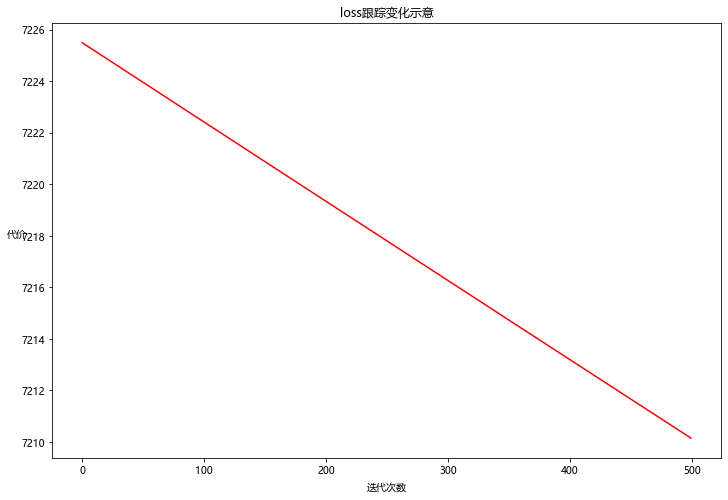

In [15]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(500),loss,'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价',rotation=0)
ax.set_title('loss跟踪变化示意')
plt.show()

In [16]:
theta

array([[ 0.51078918, -0.27857024,  0.15298796,  0.39258451, -0.94321756,
         1.44615889, -0.25491945,  0.68332977,  0.61732363,  1.1962298 ,
         1.71386703, -0.68402582, -0.3613435 ]])

## 模型评估

## 精确率和召回率

In [17]:
z=data_x.dot(theta.T)
predict_y=sigmoid(z)

In [18]:
z

,0
0,1.012447
1,0.879290
2,1.883124
3,4.363128
4,1.993508
...,...
4995,3.620725
4996,1.279832
4997,-2.458911
4998,2.901095


In [19]:
#将pre值经过阈值赋值1或者0
def predict_TF (predict_y1,threshold):
    predict_y=np.array(predict_y1)
    for i in range(len(predict_y)):
        predict_y[i]=np.where(predict_y[i]>=threshold,1,0)
    return predict_y

In [20]:
def cal_TFPN (data_y,predict_y1):
    TP=TN=FP=FN=0#初始化
    predict_y2=np.array(predict_y1)
    for i in range(1,len(predict_y2)):
        if predict_y2[i]==data_y[i] and predict_y2[i]==1:
            TP+=1
        elif predict_y2[i]==data_y[i] and predict_y2[i]==0:
            TN+=1
        elif predict_y2[i]!=data_y[i] and predict_y2[i]==1:
            FP+=1
        elif predict_y2[i]!=data_y[i] and predict_y2[i]==0:
            FN+=1      
    return TP,TN,FP,FN

In [21]:
data_y.describe()

count    5000.000000
mean        0.409200
std         0.491735
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 满足, dtype: float64

In [22]:
predict_y.describe()

,0
count,5000.000000
mean,0.564500
std,0.367427
min,0.000027
25%,0.180752
50%,0.630598
75%,0.937071
max,0.999821


**先对阈值划分小测试一下**

In [23]:
predict_y1=predict_y
predict_y1=predict_TF(predict_y1,0.53)
TP,TN,FP,FN=cal_TFPN(data_y,predict_y1)

In [24]:
predict_y1

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [25]:
ACC=(TP+TN)/(TP+TN+FP+FN)
ACC

0.671134226845369

In [26]:
RECALL=TP/(TP+FN)
RECALL

0.7776148582600195

## ROC曲线和AUC

In [27]:
TPR=(TP)/(TP+FN)
TPR

0.7776148582600195

In [28]:
#threshold是阈值的意思
def ROC(y,pred):
    threshold=0
    interations=len(y)
    TPR=np.zeros(interations)
    FPR=np.zeros(interations)
    AUC=0
    
    pred=np.array(pred)
    
    for i in range(interations):
        threshold=pred[i]
        
        predict_y=predict_TF(pred,threshold)#根据阈值来划分1，0
        TP,TN,FP,FN=cal_TFPN(y,predict_y)
        
        TPR[i]=(TP/(TP+FN))
        FPR[i]=(FP/(FP+TN))
 
    return TPR,FPR,AUC

In [29]:
predict_y.columns=['Values']
predict_y_sort=predict_y.sort_values(by='Values',ascending=False)

In [30]:
TPR,FPR,AUC=ROC(data_y,predict_y_sort)

**画图**

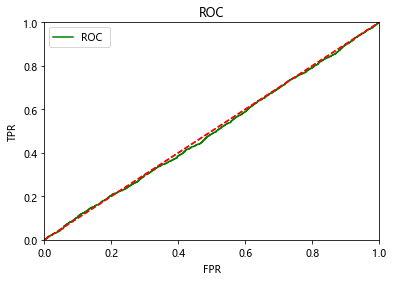

In [31]:
plt.plot(FPR,TPR,color='g',label='ROC ')
plt.title('ROC')
plt.plot([(0,0),(1,1)],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc='best')
plt.show()

基本重合，就是说，模型很一般甚至不是很好..

AUC约等于0.5